In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

import netcdf_tools
from plot_1d import plot_1d

infile='../../../../../../output/gud_1d_modifs_inspired_from_CD/run_20181019_0001_tauThetaClimRelax86400_10y/state.0000000000.t001.nc'
var='Temp'
# TO UNCOMMENT
# plot_1d(infile=infile,var=var)
# END OF TO UNCOMMENT

array1d_iT_T=netcdf_tools.read_netcdf(infile, "T")
array1d_iZ_Z=netcdf_tools.read_netcdf(infile, "Z")

array2d_iZ_iT_Temp \
=netcdf_tools.read_netcdf(infile, "Temp").squeeze().transpose()

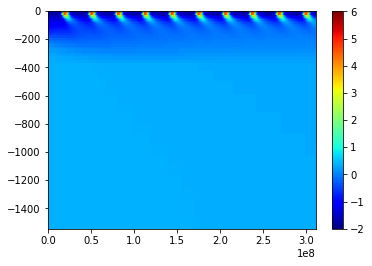

In [2]:
plt.pcolormesh(array1d_iT_T,array1d_iZ_Z,array2d_iZ_iT_Temp,cmap='jet',
               vmin=-2,vmax=6,
               shading='gouraud')
plt.colorbar()
plt.show()

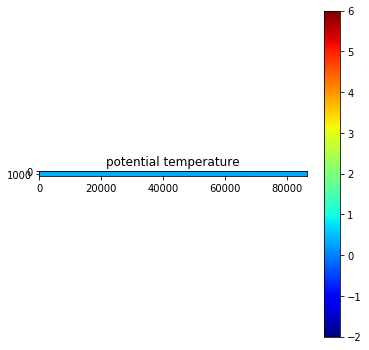

In [19]:
fint=interp1d(array1d_iZ_Z,array2d_iZ_iT_Temp.data.T,kind='linear')
array1d_iZ_Z_reg=np.arange(max(array1d_iZ_Z),min(array1d_iZ_Z),-1)
array2d_iZ_iT_Temp_interp=fint(array1d_iZ_Z_reg).T
# ref.: https://stackoverflow.com/questions/16492830/colorplot-of-2d-array-matplotlib
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_title('potential temperature')
plt.imshow(X=array2d_iZ_iT_Temp_interp,cmap='jet',vmin=-2,vmax=6)
plt.colorbar()
plt.show()

In [26]:
array2d_iZ_iT_Temp_interp[1000,1000]

0.39785164450823884

The code below is not good.

In [21]:
array1d_iZ_Z

masked_array(data=[-2.5, -7.5, -12.5, -17.5, -22.5, -27.5, -32.5, -37.5,
                   -42.5, -47.5, -55.0, -65.0, -75.0, -85.0, -97.5,
                   -112.5, -127.5, -142.5, -157.5, -175.0, -195.0, -215.0,
                   -235.0, -270.0, -320.0, -370.0, -420.0, -495.0, -595.0,
                   -720.0, -870.0, -1020.0, -1170.0, -1345.0, -1545.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=9.969209968386869e+36)

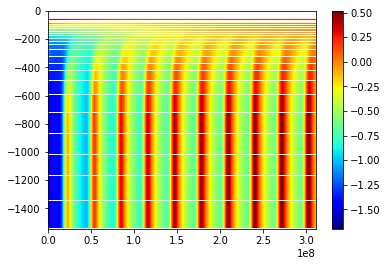

In [26]:
from scipy.interpolate import interp2d
f=interp2d(array1d_iT_T, array1d_iZ_Z, array2d_iZ_iT_Temp, kind='cubic')
array2d_iZ_iT_Temp_interp=f(array1d_iT_T,array1d_iZ_Z)
array1d_iT_Tn, array1d_iZ_Zn = np.meshgrid(array1d_iT_T,array1d_iZ_Z)
plt.pcolormesh(array1d_iT_Tn, array1d_iZ_Zn, array2d_iZ_iT_Temp_interp, cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
plt.pcolormesh(array1d_iT_T,array1d_iZ_Z_reg,array2d_iZ_iT_Temp_interp,
               cmap='jet',vmin=-2,vmax=6,shading='gouraud')
plt.colorbar()
plt.show()

In [9]:
min(array1d_iZ_Z)

-1545.0

In [29]:
fint

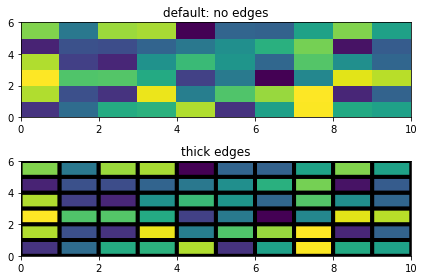

In [3]:
Z = np.random.rand(6, 10)

fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(Z)
ax0.set_title('default: no edges')

c = ax1.pcolor(Z, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

In [15]:
np.amin(array2d_iZ_iT_Temp)

-1.6979106664657593

In [5]:
Z

array([[0.03168758, 0.408756  , 0.84684226, 0.8040959 , 0.38388726,
        0.70575753, 0.19088157, 0.75671053, 0.55179614, 0.59146351],
       [0.93936054, 0.19686648, 0.70489823, 0.98895935, 0.75824815,
        0.56226209, 0.43141165, 0.79166425, 0.09169688, 0.84677537],
       [0.96000386, 0.19142078, 0.76143822, 0.06699736, 0.53743618,
        0.08208625, 0.68246201, 0.94783874, 0.70384661, 0.55150941],
       [0.57825476, 0.14027266, 0.06926869, 0.53183515, 0.3641597 ,
        0.34589422, 0.41517155, 0.84778062, 0.38928971, 0.67335968],
       [0.52771658, 0.29338409, 0.07469696, 0.57246133, 0.03119968,
        0.4175718 , 0.903534  , 0.13981444, 0.77428396, 0.11649059],
       [0.28415841, 0.06925888, 0.72973566, 0.56729308, 0.7202113 ,
        0.17621587, 0.55988028, 0.89641112, 0.33097317, 0.47082073]])

In [1]:
from __future__ import division
from matplotlib.patches import Patch
from pylab import *

dx, dy = 0.05, 0.05

x = arange(-3.0, 3.0001, dx)
y = arange(-3.0, 3.0001, dy)
X,Y = meshgrid(x, y)